## OkCupid DataSet

### Meeting #3, 10- 12- 2019


### Recap meeting_1 decisions:

<ol>
  <p>Meeting 1, 16-10-2019</p>
    <li>Merge all the essays as a unique text excluding essay4, 5, 6. </li>
  <li>Plot distribution of avarage number of words per sentence.</li>
  <li>Dont apply lowercase() and expand_contractions() instead count the number of them.</li>
  

</ol>


### Recap meeting_2 decisions:

<ol>
  <p>Meeting 2, 12-11-2019</p>
  <li>Re-code education feature</li>
  <li>Treating with outliers? keep or remove? min and max threshold?</li>
  <li>Incorrect or irrelevant information such as age 109 or sentences with length 1</li>
  <li>Check list of stopwords</li>

</ol>





### To discuss:

<ol>
  <p></p>  
  <li>Remove graduated and droped out of space camp from dataset?</li>
  <li>Correct spelling?
  <li>Feature extraction/ vectorization</li>
  <li>Feature reduction??? stemming? lemmatization</li> 
  <li> Imbalance dataset </li>

</ol>

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sn


In [2]:
import matplotlib.pyplot as plt

def plot_conf(conf_matrix):
    print('Confusion matrix:\n', conf_matrix)
    labels = ['1', '3', '5', '6', '7', '8']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.show()

### Load dataset 

In [3]:
#  Load dataset 
df = pd.read_csv('../../data/processed/preprocessed_cupid.csv', usecols=['age', 'sex','#anwps', 'clean_text', 'isced', 'isced2'])
print(df.shape)
df = df = df.dropna(subset=['clean_text', 'isced'])
print(df.shape)
df.head()

(51595, 6)
(49924, 6)


,age,sex,isced,isced2,#anwps,clean_text
0,22,m,3.0,Upper secondary education,15.000000,mei love think kind intellectualeither dumbest...
2,38,m,7.0,Master or equivalent,18.000000,im ashamed writing public text onlinedating si...
3,23,m,3.0,Upper secondary education,10.750000,work library school reading things written old...
4,29,m,6.0,Bachelor or equivalent,11.833333,hey hows going currently vague profile know to...
5,29,m,6.0,Bachelor or equivalent,11.840000,im australian living san francisco dont hold t...


In [4]:
df['isced'].value_counts()

6.0    25849
7.0    10314
3.0     9353
8.0     2781
5.0     1450
1.0      177
Name: isced, dtype: int64

In [5]:
corpus = df['clean_text']
target = df["isced"]



<p>Document-term matrix</p>
<li> A mathematical matrix that describes the frequency of terms that occur in a collection of documents</li>
<li>Rows correspond to documents </li>
<li>Columns correspond to terms</li>

<img src="rep2_image/vector_matrix.jpg">


In [6]:
# frequency encoding scikit-learn
vectorizer = CountVectorizer(binary=False, ngram_range=(1, 2))
vectors = vectorizer.fit_transform(corpus)


## Supervised classification: 

<ol>
  <p></p>
    <img src="rep2_image/split_dataset.JPG">
    
  
  

</ol>

In [7]:
X_train, X_val, y_train, y_val = train_test_split(vectors, target, train_size=0.75,
                                                          test_size=0.25, random_state = 0)

### Naive Bayes classifier
     
#### Naive Bayes models typically provide very strong baselines for text classification problems


Final Accuracy for NB: 0.5248778142777021
Confusion matrix:
 [[   0    4    0   45    1    0]
 [   0  139    0 2161   19    2]
 [   0    8    0  331    4    1]
 [   0   69    0 6339   94    4]
 [   0   12    0 2531   72    2]
 [   0    4    0  601   37    1]]


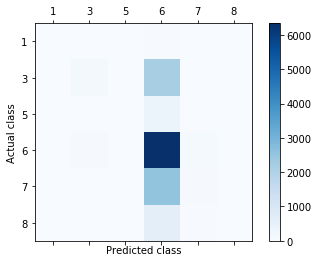

In [8]:
from sklearn.metrics import confusion_matrix

naive_model = OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))
naive_model.fit(X_train, y_train)
gnb_predictions = naive_model.predict(X_val)
print("Final Accuracy for NB: %s"% accuracy_score(y_val, gnb_predictions))
cm = confusion_matrix(y_val, gnb_predictions) 
plot_conf(cm)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
svm_model = LinearSVC(max_iter=5000, random_state=0, tol=1e-5)
svm_model.fit(X_train, y_train)
y_predictions = svm_model.predict(X_val) 
# plot_conf(confusion_matrix(y_val, y_predictions))
print("Final Accuracy for svm: %s"% accuracy_score(y_val, y_predictions))


In [10]:
# labels = ['Primary education', 'Upper secondary education', 'Short-cycle tertiary education', 'Bachelor or equivalent',
#             'Master or equivalent', 'Doctoral or equivalent']

In [11]:
cm = confusion_matrix(y_val, y_predictions) 
plot_conf(cm)

NameError: name 'y_predictions' is not defined

In [1]:
# from gensim.models import Word2Vec
# wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
# wv.init_sims(replace=True)

In [ ]:
from itertools import islice
list(islice(wv.vocab, 13030, 13050))

In [ ]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [ ]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(df, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['post']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['post']), axis=1).values

X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['tags'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.tags))
print(classification_report(test.tags, y_pred,target_names=my_tags))